<a href="https://colab.research.google.com/github/Gabriel-br07/Keras_image_classifier/blob/main/Keras_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import cv2

In [32]:


train_not = '/content/drive/MyDrive/is_that_santa/train/not-a-santa' #not-a-santa
train_santa = '/content/drive/MyDrive/is_that_santa/train/santa' #santa

In [33]:
# 0 = not-a-santa
# 1 = santa
train = []
img_size = 25
def organizar_dados(train_a,train_b):

  for imagens in os.listdir(train_a):
    caminho_arq = os.path.join(train_a,imagens)
    img = cv2.imread(caminho_arq,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(img_size,img_size))
    train.append([img,0])

  for imagens in os.listdir(train_b):
    caminho_arq = os.path.join(train_b,imagens)
    img = cv2.imread(caminho_arq,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(img_size,img_size))
    train.append([img,1])

organizar_dados(train_not,train_santa)

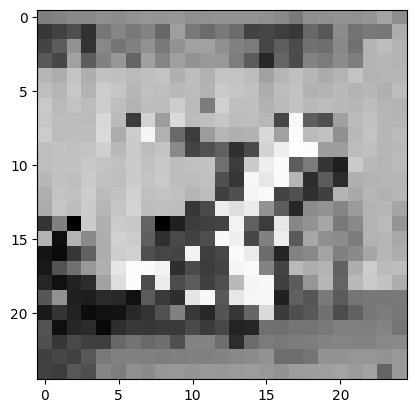

In [34]:
import matplotlib.pyplot as plt

for imagens in os.listdir(train_santa):
  caminho_arq = os.path.join(train_santa,imagens)
  img = cv2.imread(caminho_arq,cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img,(img_size,img_size))
  plt.imshow(img,cmap = 'gray')
  plt.show()
  break


In [35]:
print(len(train))

614


In [36]:
import random

random.shuffle(train)

In [37]:

import numpy as np


X = []
Y = []

X = np.array([data[0] for data in train]).reshape(-1, img_size, img_size, 1)
Y = np.array([data[1] for data in train])

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
test_not = '/content/drive/MyDrive/is_that_santa/test/not-a-santa' #not-a-santa
test_santa = '/content/drive/MyDrive/is_that_santa/test/santa' #santa

test = []

def organizar_dados_test(test_a,test_b):

  for imagens in os.listdir(test_a):
    caminho_arq = os.path.join(test_a,imagens)
    img = cv2.imread(caminho_arq,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(img_size,img_size))
    test.append([img,0])

  for imagens in os.listdir(test_b):
    caminho_arq = os.path.join(test_b,imagens)
    img = cv2.imread(caminho_arq,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(img_size,img_size))
    test.append([img,1])


organizar_dados_test(test_not,test_santa)


X_test = []
Y_test = []
for features , label in test:
  X_test.append(features)
  Y_test.append(label)

X_test = np.array(X_test).reshape(-1,img_size,img_size,1)

In [40]:
from keras.utils import to_categorical


X = X/255.0
Y = np.array(Y)
Y = Y.reshape(-1, 1)


X_test = X_test/255.0
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(-1,1)

model = keras.Sequential([
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu',input_shape = X.shape[1:]),
    layers.MaxPooling2D(pool_size = (2,2)),

    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),

    layers.Flatten(),
    layers.Dense(1,activation = 'sigmoid')

])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


model.fit(X,Y,batch_size = 32,epochs=10  ,validation_split = 0.2)



Epoch 1/10
16/16 [==============================] - 2s 49ms/step - loss: 0.6757 - accuracy: 0.5153 - val_loss: 0.6698 - val_accuracy: 0.5122
Epoch 2/10
16/16 [==============================] - 1s 37ms/step - loss: 0.6291 - accuracy: 0.6558 - val_loss: 0.6239 - val_accuracy: 0.6911
Epoch 3/10
16/16 [==============================] - 1s 39ms/step - loss: 0.5952 - accuracy: 0.7413 - val_loss: 0.5713 - val_accuracy: 0.7805
Epoch 4/10
16/16 [==============================] - 1s 36ms/step - loss: 0.5222 - accuracy: 0.7739 - val_loss: 0.5178 - val_accuracy: 0.7805
Epoch 5/10
16/16 [==============================] - 1s 35ms/step - loss: 0.4809 - accuracy: 0.7882 - val_loss: 0.4736 - val_accuracy: 0.8211
Epoch 6/10
16/16 [==============================] - 1s 37ms/step - loss: 0.4391 - accuracy: 0.8086 - val_loss: 0.4435 - val_accuracy: 0.8049
Epoch 7/10
16/16 [==============================] - 1s 35ms/step - loss: 0.4000 - accuracy: 0.8330 - val_loss: 0.4387 - val_accuracy: 0.8293
Epoch 8/10
16

20/20 [==============================] - 0s 9ms/step


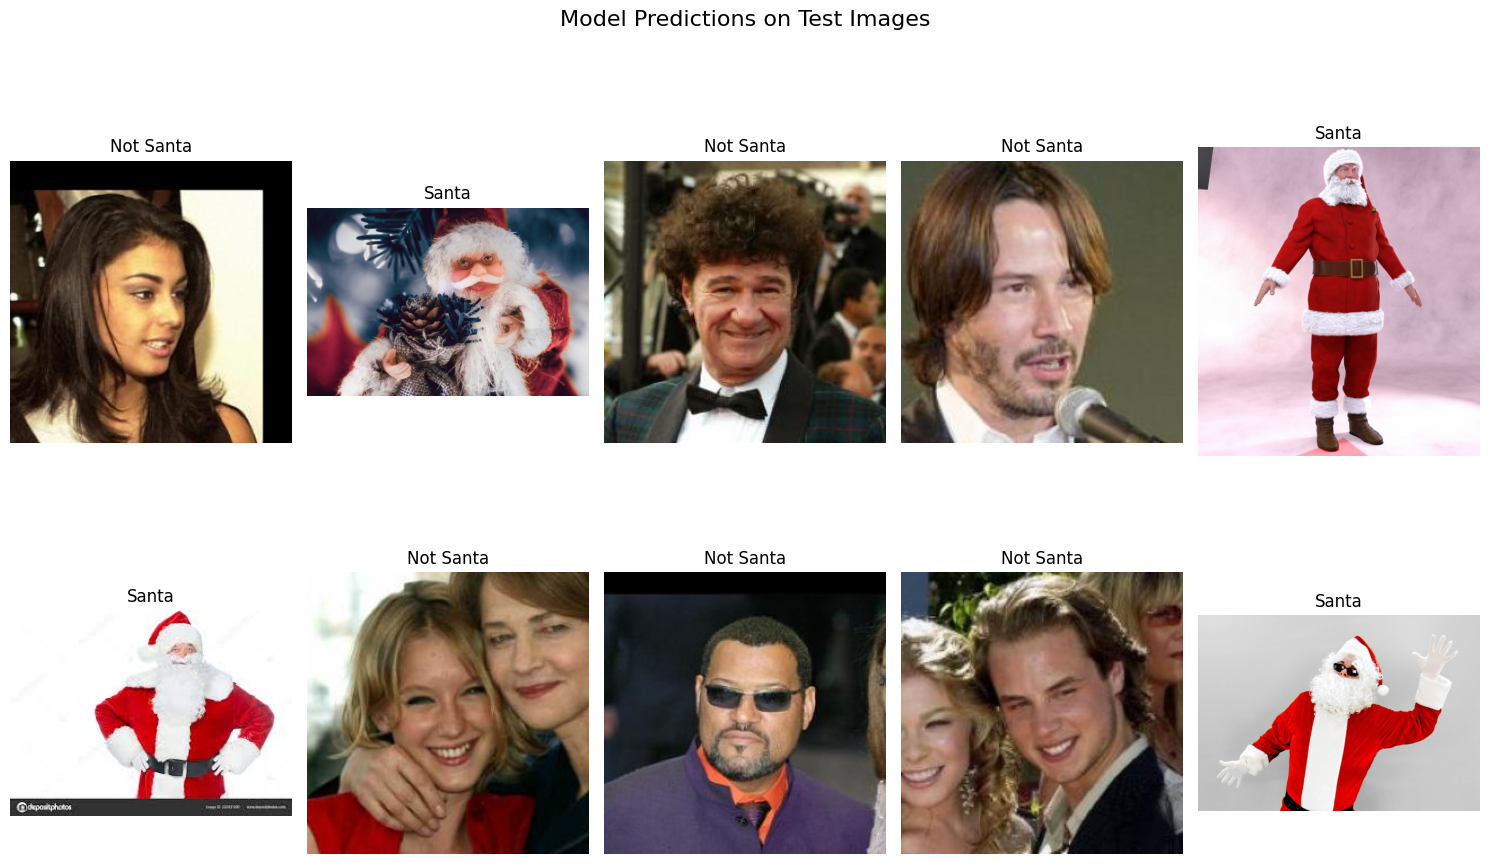

In [42]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


def is_grayscale(img):
    return img.ndim == 2

images_before = []
labels_before = []


for imagens in os.listdir(test_not):
    caminho_arq = os.path.join(test_not, imagens)
    img = cv2.imread(caminho_arq)
    if img is not None:
        if is_grayscale(img):
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images_before.append(img)
        labels_before.append(0)

for imagens in os.listdir(test_santa):
    caminho_arq = os.path.join(test_santa, imagens)
    img = cv2.imread(caminho_arq)
    if img is not None:
        if is_grayscale(img):
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images_before.append(img)
        labels_before.append(1)


predictions = model.predict(X_test)


sample_indices = np.random.choice(range(len(images_before)), size=10, replace=False)


plt.figure(figsize=(15, 10))
plt.suptitle('Model Predictions on Test Images', fontsize=16)
for i, idx in enumerate(sample_indices, 1):
    plt.subplot(2, 5, i)
    image = images_before[idx]
    plt.imshow(image)
    if predictions[idx][0] >= 0.5:
        plt.title("Santa")
    else:
        plt.title("Not Santa")
    plt.axis('off')
plt.tight_layout()
plt.show()
